# Mini-Project AI/ML
### DATASET : Housing Price
**Submitted by:** Nikita Yadav   

##### Objective of the Project
 ***predict house prices using a Supervised Machine Learning approach (regression).
 Features (X): attributes of the house like area, bedrooms, bathrooms, stories, location features, and furnishing details.
 Target (y): price — the value we want to predict.
 Goal: Compare two models — Linear Regression and Random Forest Regression — and evaluate their performance using RMSE and R².***

In [1]:
#import labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Housing.csv") #load data
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
print(df.head()) #firset 5

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
print(df.info()) #data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [5]:
print(df.isnull().sum()) #missing values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
#features and target
TARGET = "price"
X = df.drop(columns=[TARGET])
y = df[TARGET]

In [7]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object', 'category']).columns.tolist()

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


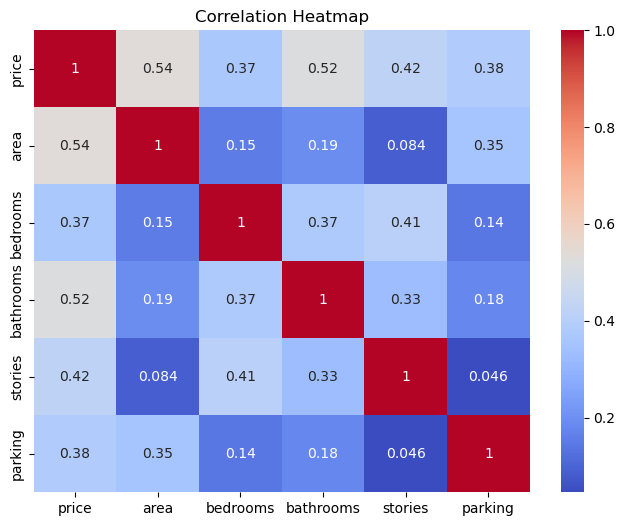

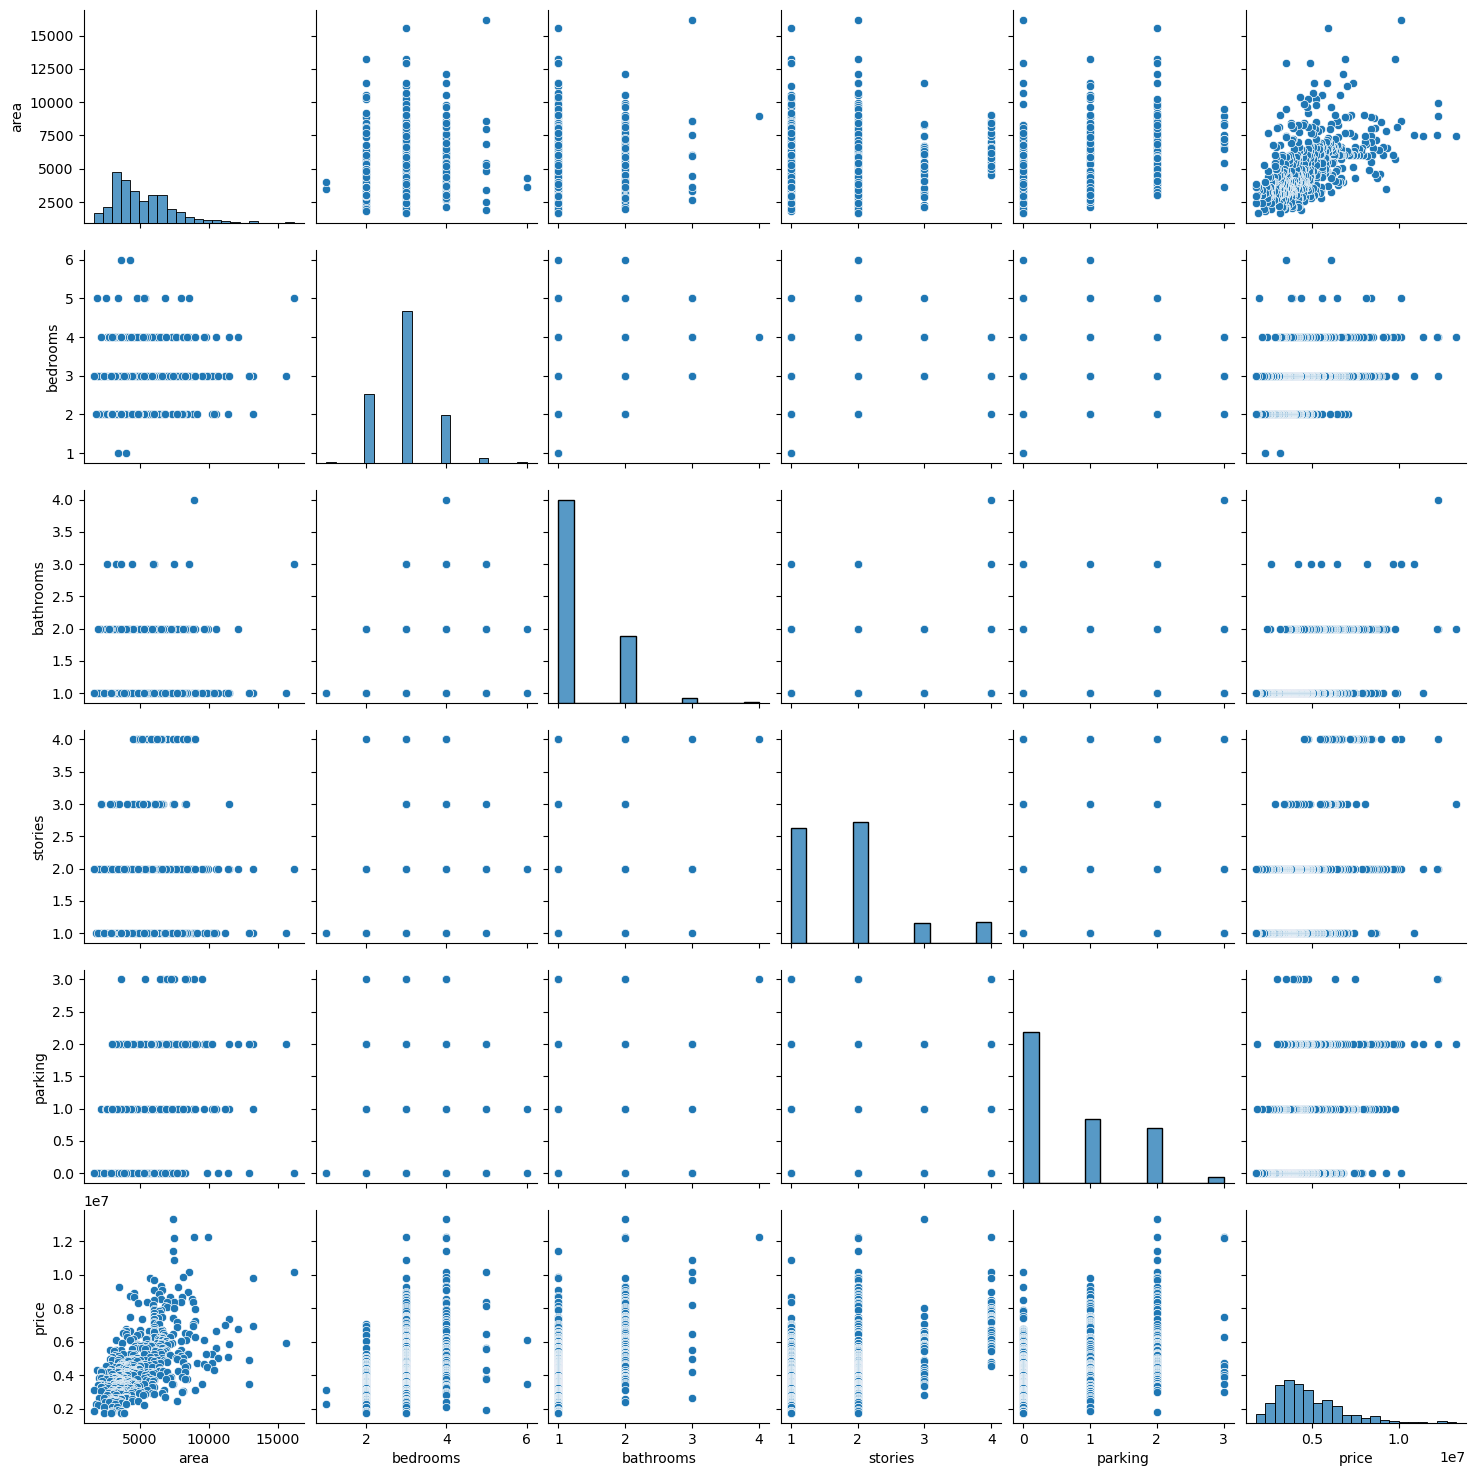

In [8]:
#EDA
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[numeric_cols + [TARGET]])
plt.show()

In [10]:
#Data Preprossesing
preprocessor = ColumnTransformer([
    ("num", "passthrough", numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])
print(preprocessor)

ColumnTransformer(transformers=[('num', 'passthrough',
                                 ['area', 'bedrooms', 'bathrooms', 'stories',
                                  'parking']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['mainroad', 'guestroom', 'basement',
                                  'hotwaterheating', 'airconditioning',
                                  'prefarea', 'furnishingstatus'])])


In [11]:
#tarin and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
93,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
335,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
412,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
471,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,yes,no,no,no,yes,0,no,unfurnished
106,5450,4,2,1,yes,no,yes,no,yes,0,yes,semi-furnished
270,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
435,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished


In [13]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished
77,6500,3,2,3,yes,no,no,no,yes,0,yes,furnished
360,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
90,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
493,3960,3,1,1,yes,no,no,no,no,0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
357,6930,4,1,2,no,no,no,no,no,1,no,furnished
39,6000,4,2,4,yes,no,no,no,yes,1,no,semi-furnished
54,6000,3,2,2,yes,yes,no,no,yes,1,no,semi-furnished


In [14]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [15]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [16]:
#linear regression
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("\n=== Linear Regression Results ===")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))
#model defined


=== Linear Regression Results ===
RMSE: 1324506.960091438
R² Score: 0.6529242642153188


In [17]:
#forest regression model defining
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("\n=== Random Forest Regression Results ===")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


=== Random Forest Regression Results ===
RMSE: 1404074.8183960614
R² Score: 0.6099715703676805


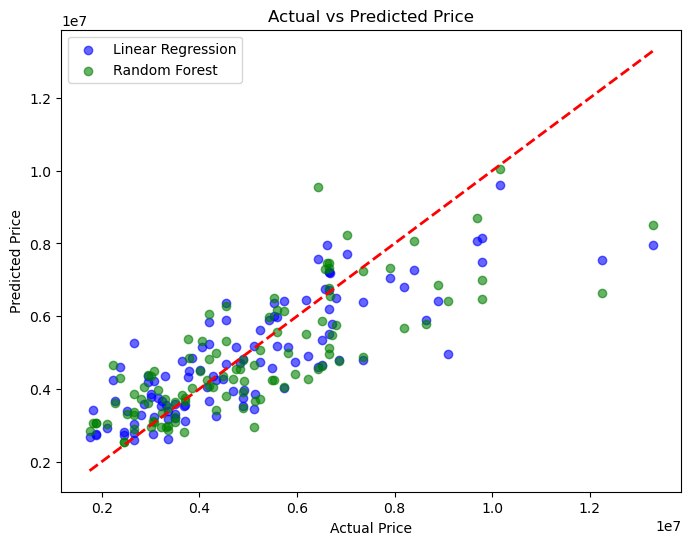

In [18]:
#visualizing prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color="blue", alpha=0.6, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.6, label="Random Forest")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.legend()
plt.show()

In [19]:
X_area = df[["area"]]
y_price = df["price"]

In [20]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(X_area, y_price, test_size=0.2, random_state=42)

In [21]:
simple_lr = LinearRegression()
simple_lr.fit(Xa_train, ya_train)
ya_pred = simple_lr.predict(Xa_test)

In [22]:
print("\n=== Simple Linear Regression: area → price ===")
print("Coefficient:", simple_lr.coef_)
print("Intercept:", simple_lr.intercept_)
print("RMSE:", np.sqrt(mean_squared_error(ya_test, ya_pred)))
print("R² Score:", r2_score(ya_test, ya_pred))



=== Simple Linear Regression: area → price ===
Coefficient: [425.72984194]
Intercept: 2512254.2639593435
RMSE: 1917103.7021424233
R² Score: 0.27287851871974644


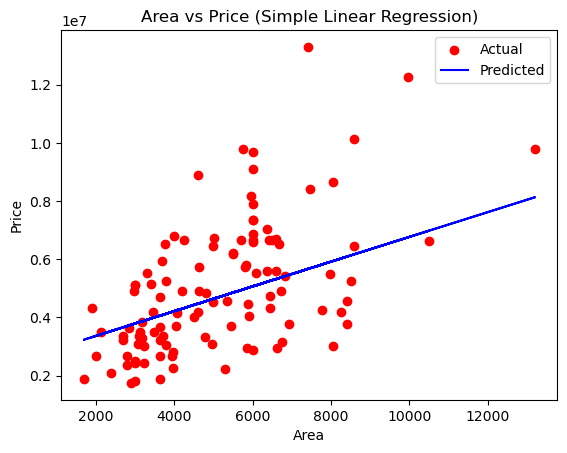

In [23]:
plt.scatter(Xa_test, ya_test, color="red", label="Actual")
plt.plot(Xa_test, ya_pred, color="blue", label="Predicted")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price (Simple Linear Regression)")
plt.legend()
plt.show()